In [1]:
import pandas as pd  # keywords are highlighted in green, other strings in red, etc.
import numpy as np

In [2]:
# Show DataFrame info.
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

tips=pd.read_excel('marketing_customer_analysis.xlsx', index_col=0) 
display(tips.head())

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# Describe DataFrame.

tips.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [4]:
tips.nunique()

State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [6]:
data=tips.drop(['State', 'Customer Lifetime Value', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type',
       'Vehicle Class','Vehicle Size'], axis=1)

In [7]:
data

,Response,Income,Sales Channel,Total Claim Amount
Customer,,,,
BU79786,No,56274,Agent,384.811147
QZ44356,No,0,Agent,1131.464935
AI49188,No,48767,Agent,566.472247
WW63253,No,0,Call Center,529.881344
HB64268,No,43836,Agent,138.130879
...,...,...,...,...
LA72316,No,71941,Web,198.234764
PK87824,Yes,21604,Branch,379.200000
TD14365,No,0,Branch,790.784983


<AxesSubplot:>

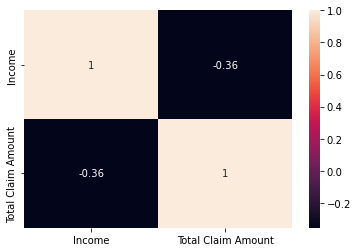

In [8]:
corelation=data.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns ,annot=True)

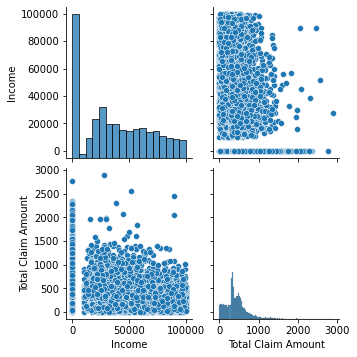

In [9]:
sns.pairplot(data)

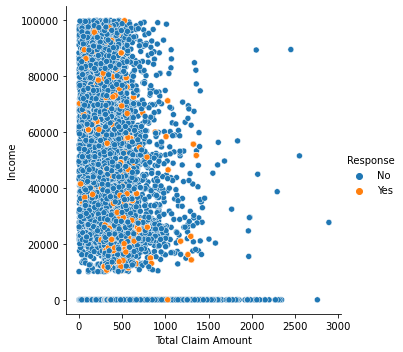

In [10]:
sns.relplot(x='Total Claim Amount', y='Income', hue='Response',  data=data)

In [21]:
data.loc[:,['Response']].value_counts

<bound method DataFrame.value_counts of          Response
Customer         
BU79786        No
QZ44356        No
AI49188        No
WW63253        No
HB64268        No
...           ...
LA72316        No
PK87824       Yes
TD14365        No
UP19263        No
Y167826        No

[9134 rows x 1 columns]>

In [28]:
print(data.loc[:,'Sales Channel'])

Customer
BU79786          Agent
QZ44356          Agent
AI49188          Agent
WW63253    Call Center
HB64268          Agent
              ...     
LA72316            Web
PK87824         Branch
TD14365         Branch
UP19263         Branch
Y167826    Call Center
Name: Sales Channel, Length: 9134, dtype: object


In [29]:
print(data.loc[:,'Total Claim Amount'])

Customer
BU79786     384.811147
QZ44356    1131.464935
AI49188     566.472247
WW63253     529.881344
HB64268     138.130879
              ...     
LA72316     198.234764
PK87824     379.200000
TD14365     790.784983
UP19263     691.200000
Y167826     369.600000
Name: Total Claim Amount, Length: 9134, dtype: float64


In [30]:
print(data.loc[:,'Income'])

Customer
BU79786    56274
QZ44356        0
AI49188    48767
WW63253        0
HB64268    43836
           ...  
LA72316    71941
PK87824    21604
TD14365        0
UP19263    21941
Y167826        0
Name: Income, Length: 9134, dtype: int64


In [31]:
data.value_counts

<bound method DataFrame.value_counts of          Response  Income Sales Channel  Total Claim Amount
Customer                                                   
BU79786        No   56274         Agent          384.811147
QZ44356        No       0         Agent         1131.464935
AI49188        No   48767         Agent          566.472247
WW63253        No       0   Call Center          529.881344
HB64268        No   43836         Agent          138.130879
...           ...     ...           ...                 ...
LA72316        No   71941           Web          198.234764
PK87824       Yes   21604        Branch          379.200000
TD14365        No       0        Branch          790.784983
UP19263        No   21941        Branch          691.200000
Y167826        No       0   Call Center          369.600000

[9134 rows x 4 columns]>

<AxesSubplot:>

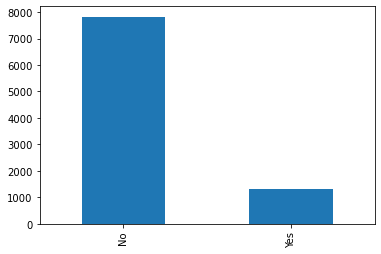

In [15]:
# Show a plot of the total number of responses.

data['Response'].value_counts().plot(kind='bar')

<AxesSubplot:>

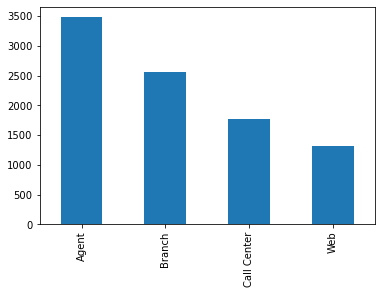

In [16]:
# Show a plot of the response rate by the sales channel.

data['Sales Channel'].value_counts().plot(kind='bar')

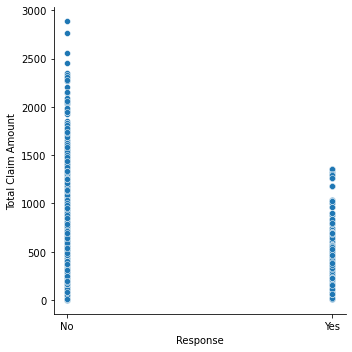

In [17]:
# Show a plot of the response rate by the total claim amount.

sns.relplot(x='Response', y='Total Claim Amount', data=data)

C:\Users\Elohome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


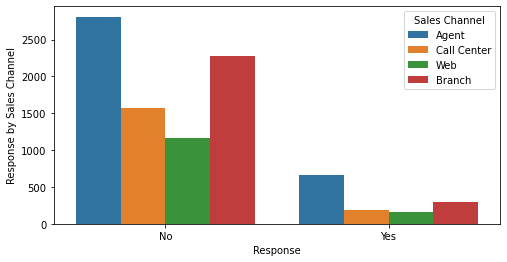

In [19]:
plt.figure(figsize=(8,4))
sns.countplot('Response', hue='Sales Channel', data=data)
plt.ylabel('Response by Sales Channel')
plt.show()

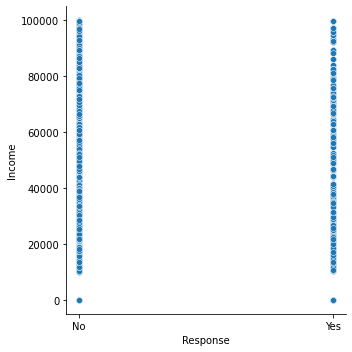

In [19]:
# Show a plot of the response rate by income.
sns.relplot(x='Response', y='Income', data=data)